In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv('Real_Estate.csv')

In [ ]:
df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [ ]:
df.tail()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
409,2013-07-25 15:30:36.565239,18.3,170.12890,6,24.981186,121.486798,29.096310
410,2013-07-26 17:16:34.019780,11.9,323.69120,2,24.950070,121.483918,33.871347
411,2013-07-28 21:47:23.339050,0.0,451.64190,8,24.963901,121.543387,25.255105
412,2013-07-29 13:33:29.405317,35.9,292.99780,5,24.997863,121.558286,25.285620
413,2013-08-01 09:49:41.506402,12.0,90.45606,6,24.952904,121.526395,37.580554


In [ ]:
df

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.01500,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.01440,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.67100,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.06700,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.40000,6,25.011037,121.479946,21.654710
...,...,...,...,...,...,...,...
409,2013-07-25 15:30:36.565239,18.3,170.12890,6,24.981186,121.486798,29.096310
410,2013-07-26 17:16:34.019780,11.9,323.69120,2,24.950070,121.483918,33.871347
411,2013-07-28 21:47:23.339050,0.0,451.64190,8,24.963901,121.543387,25.255105
412,2013-07-29 13:33:29.405317,35.9,292.99780,5,24.997863,121.558286,25.285620


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [ ]:

print(df.isnull().sum())


Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64


In [ ]:


label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])



In [ ]:
X = df.drop('House price of unit area', axis=1)
y = df['House price of unit area']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

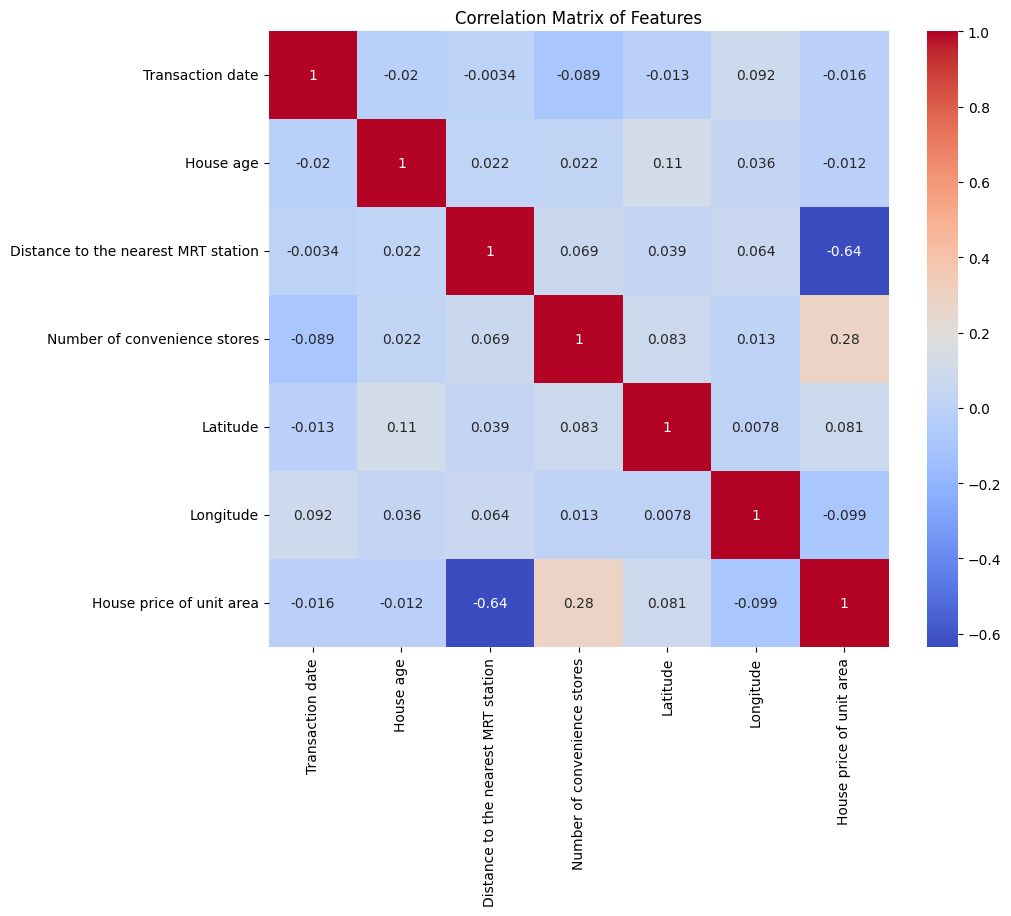

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:


from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data

,feature,VIF
0,Transaction date,4.021807e+00
1,House age,3.496581e+00
2,Distance to the nearest MRT station,1.802926e+00
3,Number of convenience stores,3.257748e+00
4,Latitude,1.037385e+06
5,Longitude,1.036905e+06


In [ ]:
df['House Price'] = df['Number of convenience stores']*df['Distance to the nearest MRT station']*df['Latitude']

In [ ]:
X=df[['House price of unit area','House age','Latitude','Distance to the nearest MRT station','Number of convenience stores','Transaction date']]
y = df[['House Price']]

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")



Root Mean Squared Error (RMSE): 102746.09819093584
R-squared (R2): 0.6763828670087499


In [ ]:

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:

y_pred = model.predict(X_test)



In [ ]:

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Root Mean Squared Error (RMSE): 102746.09819093584
R-squared (R2): 0.6763828670087499


In [ ]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_.flatten()})

In [ ]:
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

In [ ]:
print(feature_importance)

                               Feature     Importance
4         Number of convenience stores   26831.541538
3  Distance to the nearest MRT station     117.906505
5                     Transaction date     -93.386603
0             House price of unit area    -144.305733
1                            House age    -493.288698
2                             Latitude -169490.635607


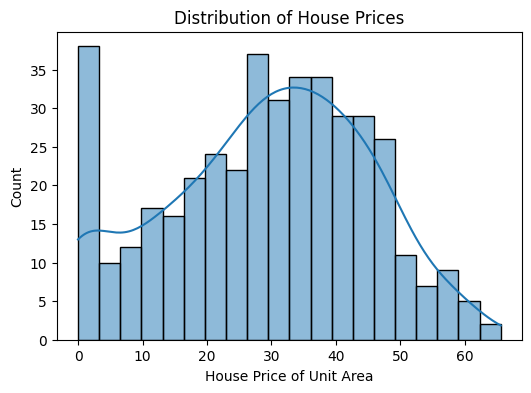

In [ ]:


# Distribution of target variable
plt.figure(figsize=(6, 4))
sns.histplot(df['House price of unit area'], kde=True, bins=20)
plt.title("Distribution of House Prices")
plt.xlabel("House Price of Unit Area")
plt.show()








In [ ]:


plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)
plt.show()